# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 2nd, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

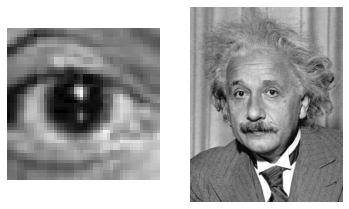

In [2]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

In [4]:
from numpy import linalg
from skimage.color import rgb2gray, rgba2rgb
from skimage import img_as_float
from skimage.feature import match_template

In [13]:
# Your solution here

def SSD_distance(image, template, threshold): #using the ucledian distance
    """
    we use a filter to match an image with a template image.
    """
    #We create an output image using the sizes of the input image and the template
    size1 = image.shape[0] - template.shape[0]
    size2 = image.shape[1] - template.shape[1]
    output = np.zeros([size1, size2])
    
    for i in range(size1):
        for j in range(size2):            
            #now we can apply the filter using the ranges
            filter_ = image[i:i + template.shape[0], j: j + template.shape[1]] - template
            #then we apply the lineal norm to get the eucledian distance, and we assign it at the corresponding position
            output[i][j] = linalg.norm(filter_) #notice that is the eucledian distance at the range we calculated, the filter
    
    #we return the output image and the binarized image (the one using the threshold)
    bin_output = output < threshold
    return output , bin_output

def cross_correlation(image, template, threshold):
    """
    we apply cross correlation using the match_template function from skimage
    """
    output = match_template(image, template)
    bin_output = output > threshold
    return output, bin_output

In [8]:
#make it grayscale
eye=io.imread('./images/eye.png')
gray_eye = rgb2gray(rgba2rgb(eye))

#make it grayscale
einstein=io.imread('./images/einstein.png')
gray_einstein = rgb2gray(rgba2rgb(einstein))

#make it float so we can have pixel values between [0,1]
gray_einstein = img_as_float(gray_einstein)
gray_eye = img_as_float(gray_eye)

#then we normalize, just in case
gray_einstein_norm = (gray_einstein - np.min(gray_einstein)) / (np.max(gray_einstein) - np.min(gray_einstein))
gray_eye_norm = (gray_eye - np.min(gray_eye)) / (np.max(gray_eye) - np.min(gray_eye))

#now we just call the functions we defined
ssd_distance, binarized_ssd = SSD_distance(gray_einstein_norm, gray_eye_norm, 8.5)
crossed, binarized_cross = cross_correlation(gray_einstein_norm, gray_eye_norm, 0.55)

(-0.5, 594.5, 761.5, -0.5)

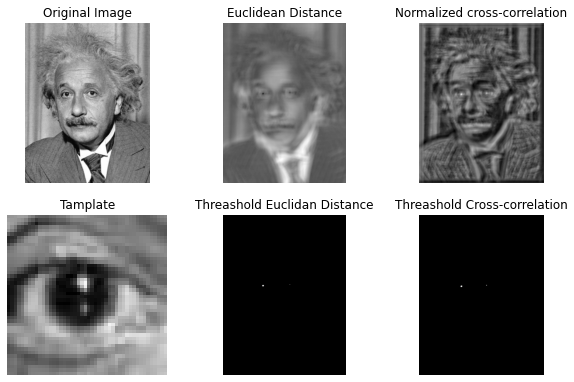

In [9]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original Image')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate')
plt.imshow(eye, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross, cmap='gray')
plt.axis('off')


In [87]:
print(np.min(ssd_distance))
print(np.max(crossed))

2.290275840566493
0.9768202443115015


**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

In [146]:
# Your solution here
# Passing eyes to graylevels
eye=io.imread('./images/eye.png')
gray_eye = rgb2gray(rgba2rgb(eye))

einstein2 =io.imread('./images/einstein_br.png')
gray_einstein2 = rgb2gray(einstein2)

gray_einstein2 = img_as_float(gray_einstein2)
gray_eye = img_as_float(gray_eye)

#now we just call the functions we defined
ssd_distance2, binarized_ssd2 = SSD_distance(gray_einstein2, gray_eye, 8)
crossed2, binarized_cross2 = cross_correlation(gray_einstein2, gray_eye, 0.55)

<ipython-input-146-c365a69b54c9>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_einstein2 = rgb2gray(einstein2)


(-0.5, 549.5, 716.5, -0.5)

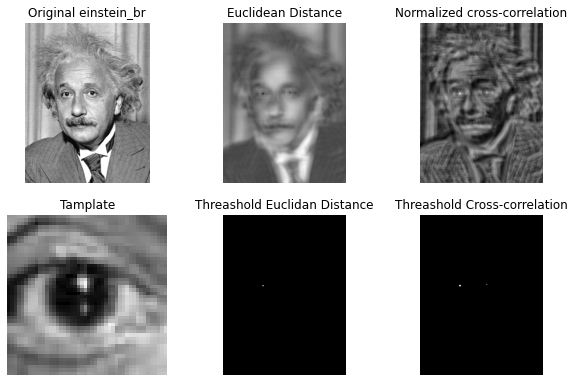

In [147]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein_br')
plt.imshow(einstein2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate')
plt.imshow(eye, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross2, cmap='gray')
plt.axis('off')

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [103]:
# Your solution here
print(np.min(ssd_distance2))
print(np.max(crossed2))

3.0698531963845404
0.9768232838639557


Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

In [152]:
# Your solution here

eye=io.imread('./images/eye.png')
gray_eye = rgb2gray(rgba2rgb(eye))

einstein3 =io.imread('./images/einstein_mask.png')
gray_einstein3 = rgb2gray(einstein3)

gray_einstein3 = img_as_float(gray_einstein3)
gray_eye = img_as_float(gray_eye)

#now we just call the functions we defined
ssd_distance3, binarized_ssd3 = SSD_distance(gray_einstein3, gray_eye, 8.5)
crossed3, binarized_cross3 = cross_correlation(gray_einstein3, gray_eye, 0.55)
#we have to lower the threshhold to get any matches, but of course these matches are wrong

<ipython-input-152-a2f8c430b067>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_einstein3 = rgb2gray(einstein3)


(-0.5, 549.5, 716.5, -0.5)

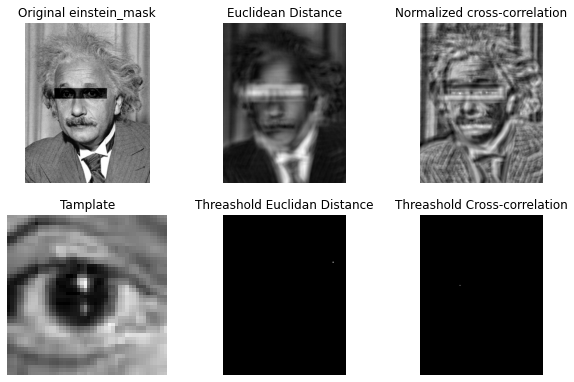

In [153]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein_mask')
plt.imshow(einstein3, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance3, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed3, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate')
plt.imshow(eye, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd3, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross3, cmap='gray')
plt.axis('off')

Print the minimum SSD and the maximum NCC

In [102]:
# Your solution here
print(np.min(ssd_distance3))
print(np.max(crossed3))

8.27263708944657
0.6166362739337297


What are the distances between the template and the image around the eyes of the image? 

In [ ]:
# Your solution here
"""
If we normalize the output image, we get that the distance goes from 0 to 1. Therefore, if we do have a match, the distnce will
be 0; otherwise, the distance will vary up until 1.  Of course, since we didnt normalize the output we see values
of 2, 6, 8, etc... but if we normalize it, it goes from 0 to 1.
"""

Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here
"""
Is the algorithms affected by contrast changes in the image?

Yes, and we can see this when we print the distances. As we change the contrast of the images, we see different values for the
distances.

How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases?
As contrasts increases, so does the minimum eucledian distance, while the maximum NCC decreases

Is there a big difference among these values?
The minimum eucledian distance varies a lot when you compare normal einstein and einstein_mask. The maximum value of the NCC 
decreases, but the changes are not as big, its a matter of decimals.

What parameters it has and which measure for image comparisons works better.
The threshold parameter for eucledian distance can go from 5 to 8.5 to get resonable outcomes. 8.5 being the best
The threshold parameter for cross correlation can go from 0.55 to 0.9 to get resonable outcomes. 0.55 being the best

If you go beyond these ranges, you will get fake matches witht the einstein image.
"""

**1.3** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

In [160]:
# Your solution here
#this time we use the different template
eye_br=io.imread('./images/eye_br.png')
gray_eye_br = rgb2gray(eye_br)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
gray_eye_br = img_as_float(gray_eye_br)

#now we just call the functions we defined
ssd_distance4, binarized_ssd4 = SSD_distance(gray_einstein4, gray_eye_br, 8)
crossed4, binarized_cross4 = cross_correlation(gray_einstein4, gray_eye_br, 0.55)
#we can see that the outcome its pretty similiar; however, we wouldnt get the same result if we use the previous parameters,
#such as 5 for eucledian and 0.9 for cross. These threshold parameters would not work because of the new template, so the 
#threshold effectiveness range changes

<ipython-input-160-0d9376d9d27d>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_eye_br = rgb2gray(eye_br)


(-0.5, 549.5, 716.5, -0.5)

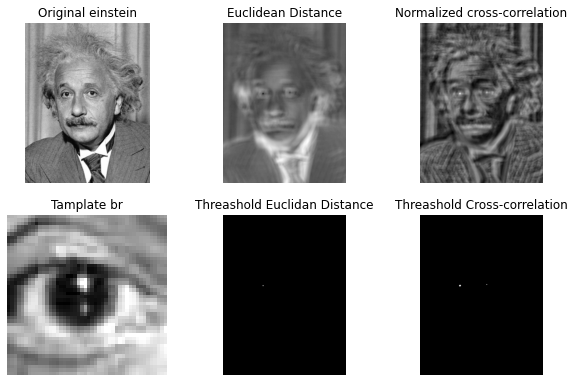

In [163]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance4, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed4, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate br')
plt.imshow(eye_br, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd4, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross4, cmap='gray')
plt.axis('off')

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

In [162]:
# Your solution here
from skimage.transform import rotate
#this time we use a 2 degree angle
eye=io.imread('./images/eye.png')
eye_angle_2 = rotate(rgb2gray(eye), 2)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
eye_angle_2 = img_as_float(eye_angle_2)

#now we just call the functions we defined
ssd_distance5, binarized_ssd5 = SSD_distance(gray_einstein4, eye_angle_2, 8)
crossed5, binarized_cross5 = cross_correlation(gray_einstein4, eye_angle_2, 0.55)

<ipython-input-162-828ae93bc0e1>:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye_angle_2 = rotate(rgb2gray(eye), 2)


(-0.5, 549.5, 716.5, -0.5)

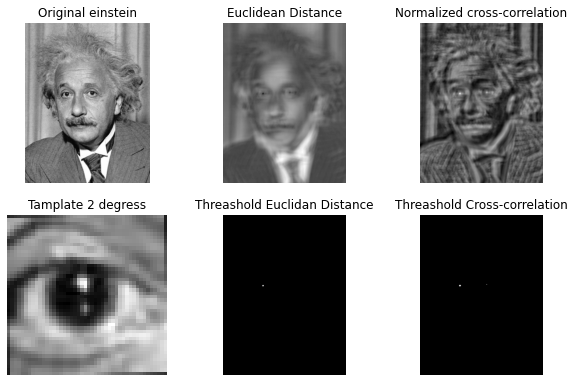

In [167]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance5, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed5, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate 2 degress')
plt.imshow(eye_angle_2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd5, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross5, cmap='gray')
plt.axis('off')

In [166]:
#this time we use a 5 degree angle
eye=io.imread('./images/eye.png')
eye_angle_5 = rotate(rgb2gray(eye), 5)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
eye_angle_5 = img_as_float(eye_angle_5)

#now we just call the functions we defined
ssd_distance6, binarized_ssd6 = SSD_distance(gray_einstein4, eye_angle_5, 8)
crossed6, binarized_cross6 = cross_correlation(gray_einstein4, eye_angle_5, 0.55)

<ipython-input-166-3e23efa6155d>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye_angle_5 = rotate(rgb2gray(eye), 5)


(-0.5, 549.5, 716.5, -0.5)

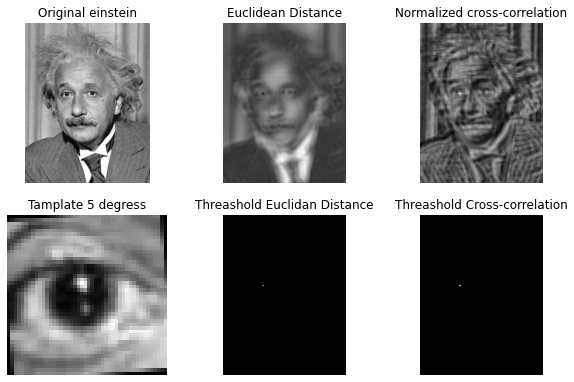

In [168]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance6, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed6, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate 5 degress')
plt.imshow(eye_angle_5, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd6, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross6, cmap='gray')
plt.axis('off')

In [172]:
#this time we use a 10 degree angle
eye=io.imread('./images/eye.png')
eye_angle_10 = rotate(rgb2gray(eye), 10)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
eye_angle_10 = img_as_float(eye_angle_10)

#now we just call the functions we defined
ssd_distance7, binarized_ssd7 = SSD_distance(gray_einstein4, eye_angle_10, 8)
crossed7, binarized_cross7 = cross_correlation(gray_einstein4, eye_angle_10, 0.55)

<ipython-input-172-2d8d96a6a47a>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye_angle_10 = rotate(rgb2gray(eye), 10)


(-0.5, 549.5, 716.5, -0.5)

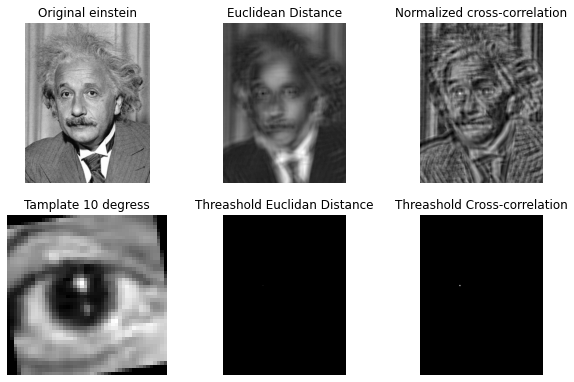

In [173]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance7, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed7, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate 10 degress')
plt.imshow(eye_angle_10, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd7, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross7, cmap='gray')
plt.axis('off')

In [ ]:
#this time we use a 15 degree angle
eye=io.imread('./images/eye.png')
eye_angle_15 = rotate(rgb2gray(eye), 15)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
eye_angle_15 = img_as_float(eye_angle_15)

#now we just call the functions we defined
ssd_distance8, binarized_ssd8 = SSD_distance(gray_einstein4, eye_angle_15, 8)
crossed8, binarized_cross8 = cross_correlation(gray_einstein4, eye_angle_15, 0.55)

(-0.5, 549.5, 716.5, -0.5)

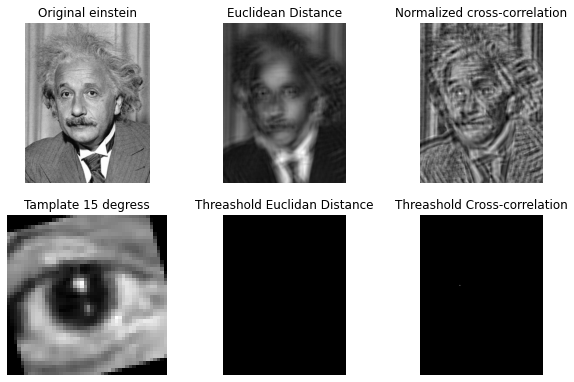

In [174]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance8, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed8, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate 15 degress')
plt.imshow(eye_angle_15, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd8, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross8, cmap='gray')
plt.axis('off')

In [176]:
#this time we use a 20 degree angle
eye=io.imread('./images/eye.png')
eye_angle_20 = rotate(rgb2gray(eye), 20)

einstein =io.imread('./images/einstein.png')
gray_einstein4 = rgb2gray(rgba2rgb(einstein))

gray_einstein4 = img_as_float(gray_einstein4)
eye_angle_20 = img_as_float(eye_angle_20)

#now we just call the functions we defined
ssd_distance9, binarized_ssd9 = SSD_distance(gray_einstein4, eye_angle_20, 8)
crossed9, binarized_cross9 = cross_correlation(gray_einstein4, eye_angle_20, 0.55)

<ipython-input-176-9d9d6fb740d9>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye_angle_20 = rotate(rgb2gray(eye), 20)


(-0.5, 549.5, 716.5, -0.5)

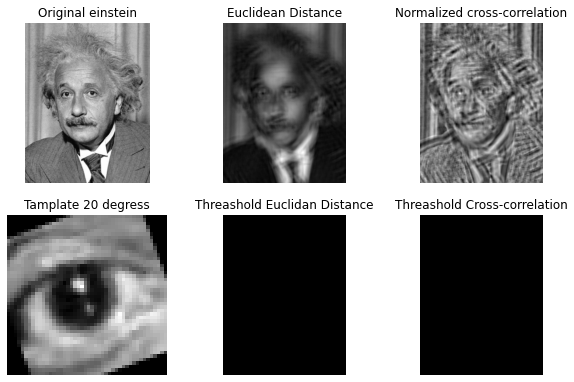

In [177]:
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Original einstein')
plt.imshow(einstein, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Euclidean Distance')
plt.imshow(ssd_distance9, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Normalized cross-correlation')
plt.imshow(crossed9, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Tamplate 20 degress')
plt.imshow(eye_angle_20, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Threashold Euclidan Distance')
plt.imshow(binarized_ssd9, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('Threashold Cross-correlation')
plt.imshow(binarized_cross9, cmap='gray')
plt.axis('off')

Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

In [ ]:
# Your solution here
"""
Please, explain briefly the algorithm, including advantages and disadvantage

According to skimage, the match_template function uses fast, normalized cross-correlation to find instances of the template 
in the image. The output is an array with values between -1.0 and 1.0, which at a given position corresponds to the 
correlation coefficient between the image and the template.

Its advantages are that the algorithm its pretty simple to understand and relatively fast; however it not resistant to the
changes in contrast.

Is the algorithms affected by contrast changes in the tempate image?
Yes, we can see the effect is not as big when we use the example, but it certernly has an effect.

What parameters it has and which measure for image comparisons works better.
Of course we have the input image, along with the template
The other parameters according to Skimage are:

pad_input : bool. If True, pad image so that output is the same size as the image, and output values correspond to the template 
center. Otherwise, the output is an array with shape (M - m + 1, N - n + 1) for an (M, N) image and an (m, n) template, 
and matches correspond to origin (top-left corner) of the template.

mode : an optional Padding mode.
constant_values : also optional. Constant values used in conjunction with mode='constant'

"""

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.png` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.png`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [5]:
# Your solution here
from skimage.feature import hog

person=io.imread('./images/person_template.bmp')
person_gray = img_as_float(rgb2gray(person))

hog_person_descriptor, hog_person_visualize = hog(person_gray, visualize=True)

<ipython-input-5-e2de1e433555>:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  person_gray = img_as_float(rgb2gray(person))


(-0.5, 48.5, 128.5, -0.5)

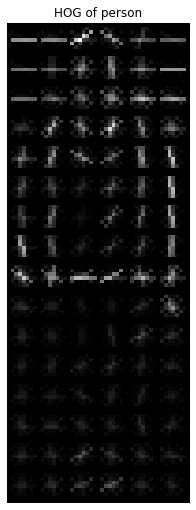

In [6]:
#visualize
fig = plt.figure(figsize=(30,30))

fig.add_subplot(3,3,1)
plt.title('HOG of person')
plt.imshow(hog_person_visualize, cmap='gray')
plt.axis('off')

**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [22]:
from skimage.feature import hog

In [33]:
#we created a method to print all of the images since they were so many
def visualize(template, image, result, x, y, height, width):

    fig=plt.figure(figsize=(18,3))
    axis1=plt.subplot(1,3,1)
    axis1.axis('off')
    axis1.set_title('Template')
    axis1.imshow(person, cmap='gray')
    
    axis2=plt.subplot(1,3,2)
    axis2.set_title('Best region match')
    axis2.axis('off')
    axis2.imshow(image, cmap='gray')
    
    axis3=plt.subplot(1,3,3, sharex=axis2, sharey=axis2)
    axis3.set_title('HOG distances')
    axis3.axis('off')
    axis3.imshow(result, cmap='gray')
    
    #for some reason, if i use one rectangle it wont let me re-use it for both, so we just declare 2
    rectangle1 = plt.Rectangle((x - width/2, y - height/2), width, height, edgecolor='r', facecolor='none')
    rectangle2 = plt.Rectangle((x - width/2, y - height/2), width, height, edgecolor='r', facecolor='none')
    
    axis2.add_patch(rectangle1)
    axis3.add_patch(rectangle2)

    plt.show()

<ipython-input-44-d10707383c20>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  person = img_as_float(rgb2gray(person))


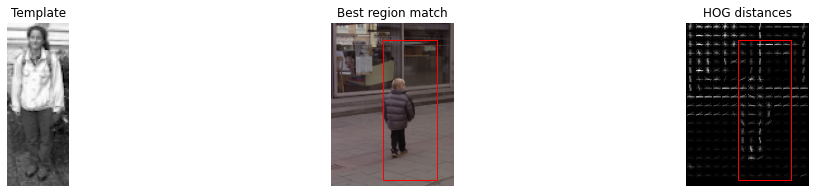

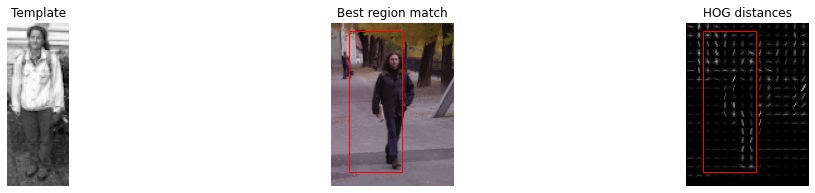

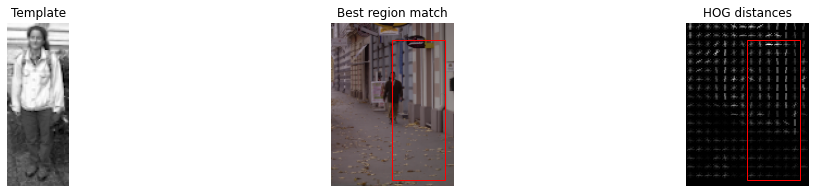

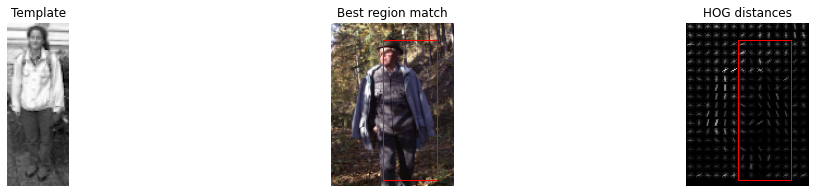

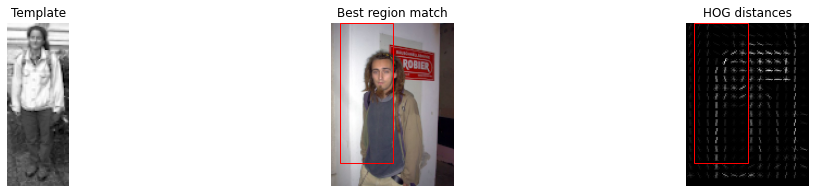

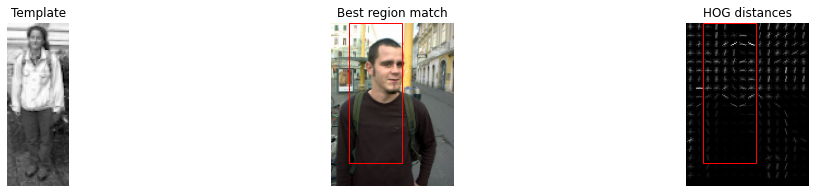

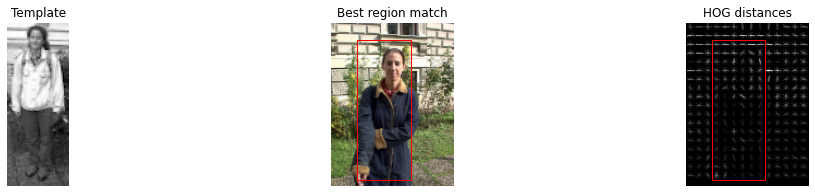

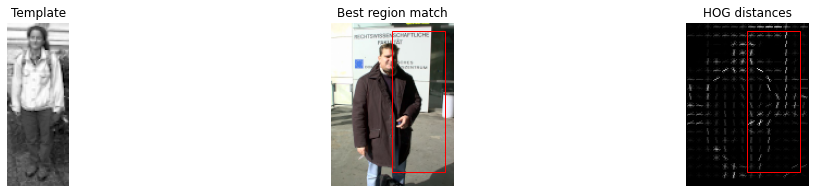

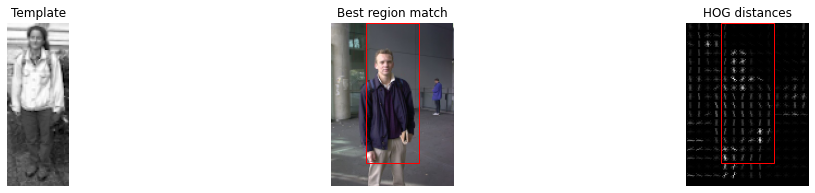

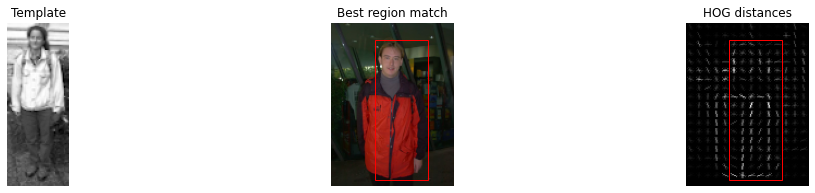

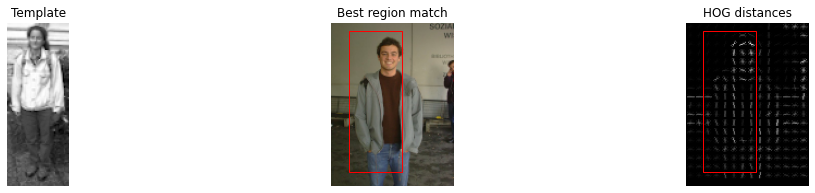

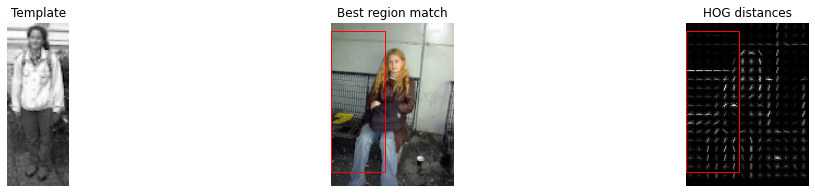

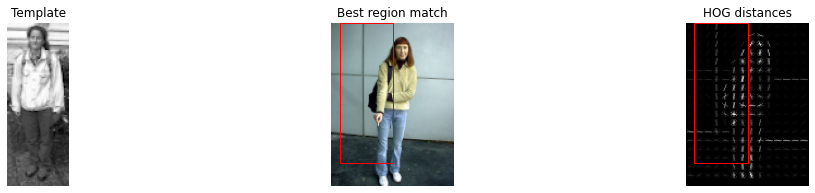

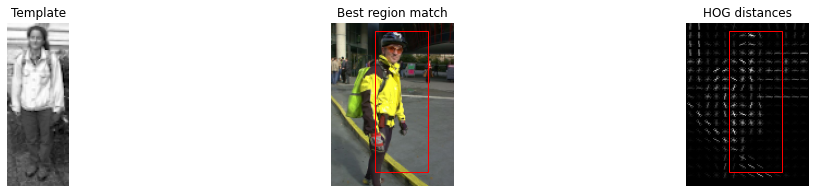

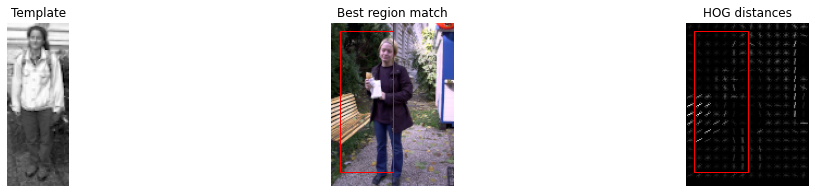

In [44]:
# Your solution here
#we do the same steps as before
person = io.imread('./images/person_template.bmp') #where person will be the template
person = img_as_float(rgb2gray(person))
hog_person_descriptor, hog_person_visualize = hog(person, visualize=True)

#we read the image collection
ic = io.ImageCollection('./images/TestPersonImages/*')

for image in ic:
    
    image_gray = rgb2gray(image)#we make it each image grayscale
    #we will save the results in this empty image, using the original shape
    result = np.zeros((image_gray.shape))
    
    #we do the same we did to get the filter(region) for eucledian distance
    size1 = image.shape[0] - person.shape[0]
    size2 = image.shape[1] - person.shape[1]
    
    #we go through the image with a sliding window of 8, vertically and horizontally
    for i in range(0, size1, 8):#it works way slower if we use 2 instead of 8
        for j in range(0, size2, 8):
            #we get the filter/region
            region = image[i : i + person.shape[0], j : j + person.shape[1]]
            #now we can get the sliding window's descriptor en image 
            hog_region_descriptor, hog_region_visualize = hog(region, visualize=True)
            
            #we update the positions accordingly
            result[i + person.shape[0]//2, j + person.shape[1]//2] = linalg.norm(hog_region_descriptor - hog_person_descriptor)

    #now we just need the information from the resulting image so we can use these coordinates for the rectangles
    #this part of the code is similar to the one in skimage
    position = np.unravel_index(np.argmax(result), result.shape)
    x, y = position[::-1] #we'll use these coordinates for the rectangles

    #we get the image descriptor and hog image
    hog_image_descriptor, hog_image_visualize = hog(image, visualize=True)

    #Finally, we call the function to visualize alll the images
    visualize(person, image, hog_image_visualize, x, y, person.shape[0], person.shape[1])

What is the dimension of your HOG descriptor? Explain it.

In [46]:
# Your solution here
"""
The descriptor we get is 1D, we can se this by printing the shape of it. The reason why it is 1D is because
when we call the skimage function hog, part of the algorithm consists in flattening the image into a feature vector
"""

'\nThe descriptor we get is 1D, we can se this by printing the shape of it. The reason why it is 1D is because\nwhen we call the skimage function hog, part of the algorithm consists in flattening the image into a feature vector\n'

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

In [4]:
# Your solution here
"""
I would say 11/15 are perfect, Image 3 is slightly off; 8, 12, 13 are just not good, and I really dont understand why. Maybe 
its because I'm using the default parameters, but I tried changing the hog parameters and saw no improvement. Changing the 
sliding window didn't help that much either. I figured it might be becuase of the background of the images, specially 12 and 13.
They dont appear to be very special, but the background actually makes a big influence to the hog descriptor, which might be why
it suffers the most with those images;still, I think its about tinkering with the parameters
"""

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

In [ ]:
# Your solution here
"""
I tried many options for the parameters of orientations, pixels_per_cell, and cells_per_block, however, I ended up using
the default parameters, since the different combinations I tried weren't as successfull as I expected. 
I tried orientations = 10, 16, 8 and 64
pixels_per_cell = (8, 8), (6, 6), and (10, 10)
cells_per_block = only (1, 1) and (2, 2)

The reason why I use a sliding window of 8 is because is faster. It also gave slightly better results compared to other
"""

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here
"""
Extract Histogram of Oriented Gradients (HOG) for a given image. Then take the HOG by normalizing the image, then compute the
gradient image for rows and colums. Afterwards, compute the gradient histograms and apply normalization across blocks. The last 
step is flattenig into a feature vector.

Template-matching is very sensitive to changes in contrast becuase it uses the pixel intensity. It is also
sensitive to shape deformations, and rotation and rescaling to a certain extent. Since HOG uses de direction of the gradient,
however, the changes in contrast have no effect while we use HOG, which is very helpul considering how flexible that is.
Nevertheless, with HOG, background descriptors can create problems for the algorithm, as we can see in some results. In
optimal conditions, HOG performs better than Template-matching, but even if we have confusing backgrounds HOG performs better.
Lets remember that having a complex background would also affect the template matching process becuase this algorithm 
is sensitive to intensity changes. Another disadvantage or fact about HOG is that it works globaly, extracting global
features, which isn't really comparable to template_mathing, but it is something to consider since this fact can also be 
considered an advantage, depending of what you want to accomplish with it.
"""